In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib as mpl
from projet_6_bis_iteration_friendly import *

In [2]:
def get_peclet_list(u_list, v_list, dx, dy, diff_coeff):
    peclet_list = []
    
    for u, v in zip(u_list, v_list):
        pe_x = (np.abs(u) * dx) / diff_coeff
        pe_y = (np.abs(v) * dy) / diff_coeff
        peclet_list.append(max(np.max(pe_x), np.max(pe_y)))
    # Détermination du maximum global
    return peclet_list

In [ ]:

# --- Paramètres du domaine et numérique ---
nx, ny = 31, 31
Lx, Ly = 1.0, 1.0
dt = 1e-3  # à ajuster si ça diverge à grand Re/Ra

dx = Lx/(nx-1)
dy = Ly/(ny-1)

# --- Grilles de paramètres ---
nu = 1.57e-5
Re_list = [100]              # -> plusieurs Re
Ra_list = np.arange(1,6)*1e5                # -> plusieurs Ra
Pr = 0.71

res_dict = {}


for i, Re in enumerate(Re_list):
    res_dict[Re] = {}
    for j, Ra in enumerate(Ra_list):
        U0, res_dict[Re][Ra]= global_resolution(nx, ny, Lx, Ly, dt, nu, Re, Ra)
        res_dict[Re][Ra]['U0'] = U0
        res_dict[Re][Ra]['Nu'] = get_average_nusselt(res_dict[Re][Ra]['T'][-1], dx)
        res_dict[Re][Ra]['Pe'] = get_peclet_list(res_dict[Re][Ra]['u'], res_dict[Re][Ra]['v'], dx, dy, 1/(Re*Pr))
        print(f"U0={U0:.3g} | Re={Re:.3e} | Ra={Ra:.1e} -> Nu={res_dict[Re][Ra]['Nu']:.4f}")


c:\Users\Thomas Brionne\Desktop\Thermal-transfert\projet_6_bis_iteration_friendly.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  res_w.append(np.linalg.norm(w_new - w)/np.linalg.norm(w))


Itération 0: Résidu w = inf, Résidu T = 4.83e-02
Itération 10: Résidu w = 6.91e-02, Résidu T = 2.15e-02
Itération 20: Résidu w = 4.67e-02, Résidu T = 1.31e-02
Itération 30: Résidu w = 3.83e-02, Résidu T = 9.47e-03
Itération 40: Résidu w = 3.12e-02, Résidu T = 7.42e-03
Itération 50: Résidu w = 2.57e-02, Résidu T = 6.12e-03
Itération 60: Résidu w = 2.15e-02, Résidu T = 5.21e-03
Itération 70: Résidu w = 1.83e-02, Résidu T = 4.54e-03
Itération 80: Résidu w = 1.59e-02, Résidu T = 4.03e-03
Itération 90: Résidu w = 1.39e-02, Résidu T = 3.63e-03
Itération 100: Résidu w = 1.24e-02, Résidu T = 3.31e-03
Itération 110: Résidu w = 1.11e-02, Résidu T = 3.04e-03
Itération 120: Résidu w = 1.01e-02, Résidu T = 2.81e-03
Itération 130: Résidu w = 9.23e-03, Résidu T = 2.62e-03
Itération 140: Résidu w = 8.49e-03, Résidu T = 2.46e-03
Itération 150: Résidu w = 7.85e-03, Résidu T = 2.32e-03
Itération 160: Résidu w = 7.30e-03, Résidu T = 2.20e-03
Itération 170: Résidu w = 6.82e-03, Résidu T = 2.10e-03
Itératio

KeyboardInterrupt: 

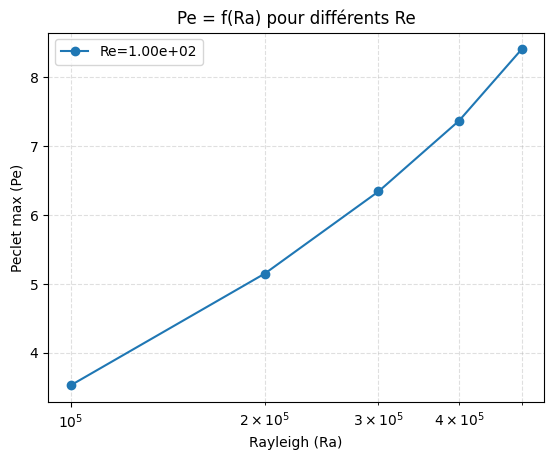

In [6]:
plt.figure()
for i, Re in enumerate(Re_list):
    plt.plot(res_dict[Re].keys(), [np.max(res_dict[Re][k]['Pe']) for k in res_dict[Re].keys()], marker="o", label=f"Re={Re:.2e}")

plt.xscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Peclet max (Pe)")
plt.title("Pe = f(Ra) pour différents Re")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()


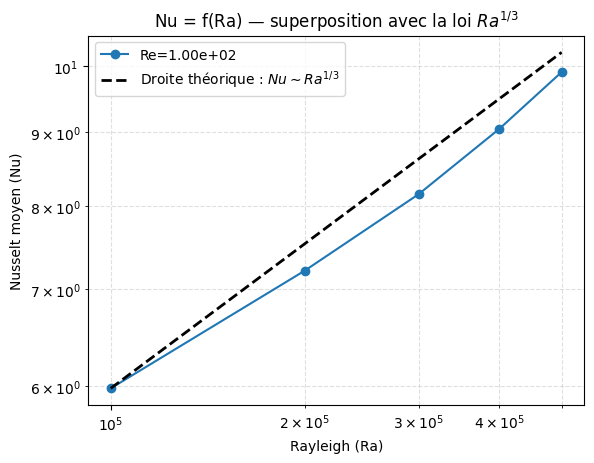

In [13]:
plt.figure()

# --- Courbes numériques ---
for i, Re in enumerate(Re_list):
    plt.plot(res_dict[Re].keys(), [res_dict[Re][k]['Nu'] for k in res_dict[Re].keys()], marker="o", label=f"Re={Re:.2e}")

# --- Choix du Re de référence (ex: Re = 100) ---
Re_ref = np.min(list(res_dict.keys()))

# --- Droite théorique : pente 1/4 ---
Ra_th = np.array(Ra_list, dtype=float)

Ra0 = Ra_th[0]
Nu0 = res_dict[Re_ref][Ra0]['Nu']

C = Nu0 / (Ra0**(1/3))
Nu_th = C * Ra_th**(1/3)

plt.plot(
    Ra_th,
    Nu_th,
    "k--",
    linewidth=2,
    label=r"Droite théorique : $Nu \sim Ra^{1/3}$"
)

# --- Mise en forme ---
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Nusselt moyen (Nu)")
plt.title("Nu = f(Ra) — superposition avec la loi $Ra^{1/3}$")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()


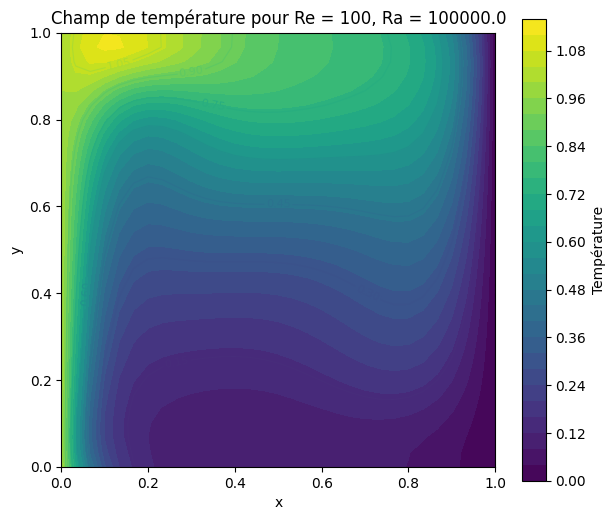

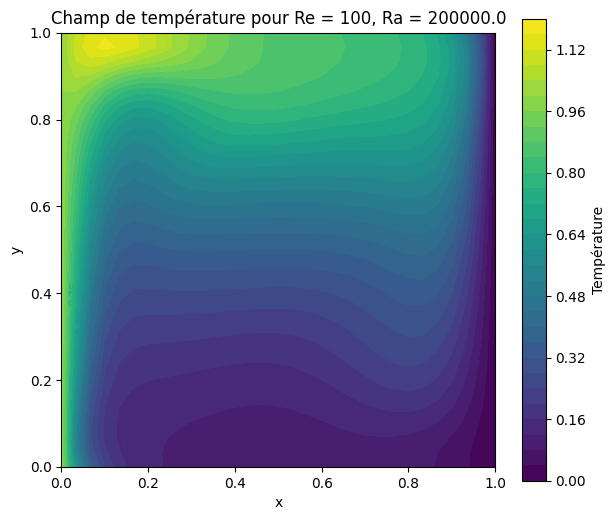

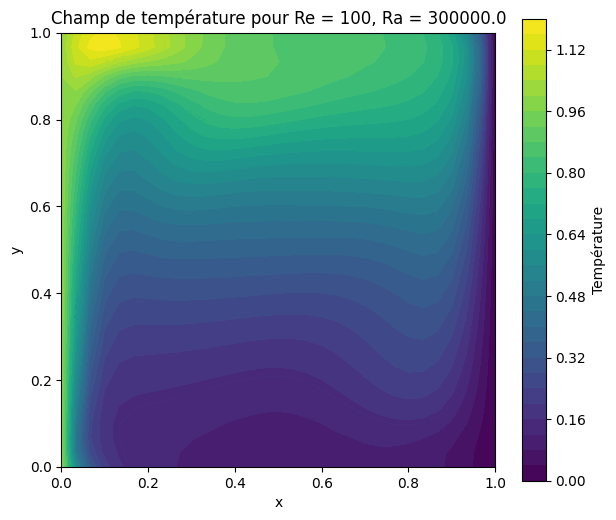

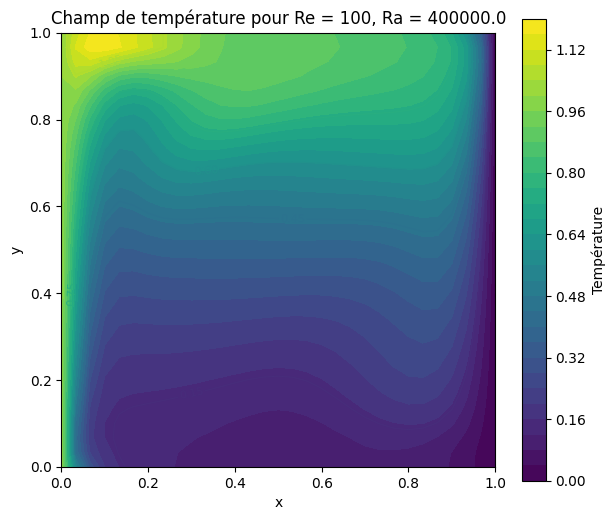

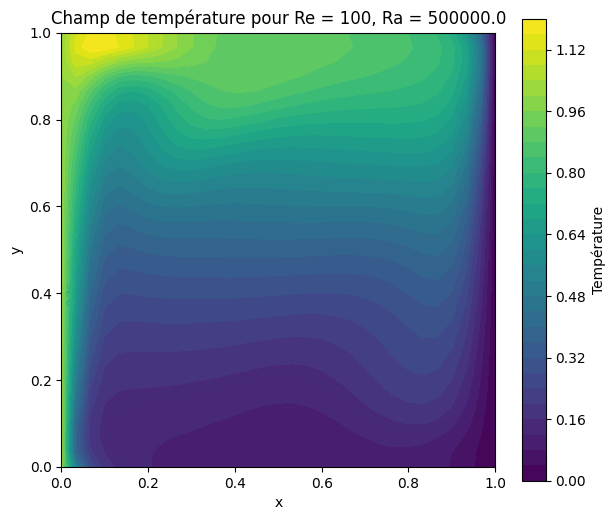

In [14]:
# 1. Préparation de la grille
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Sélection d'une itération (ex: la dernière enregistrée)
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        T_plot = res_dict[Re][Ra]['T'][-1]
        Re_plot = Re_list[i]
        Ra_plot = Ra_list[j]

        plt.figure(figsize=(7, 6))
        levels = 30

        cf = plt.contourf(X, Y, T_plot, levels=levels)   # champ coloré
        cs = plt.contour(X, Y, T_plot, levels=10, linewidths=0.8)  # isothermes
        plt.clabel(cs, inline=True, fontsize=8)

        plt.colorbar(cf, label="Température")
        plt.title("Champ de température pour Re = " + str(Re_plot) + ", Ra = " + str(Ra_plot))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, Lx)
        plt.ylim(0, Ly)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
